In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

INPUT_FILE = "indiamart_industrial_pumps_selenium.csv"
OUTPUT_FILE_CLEANED = "indiamart_industrial_pumps_cleaned.csv"

try:
    df = pd.read_csv(INPUT_FILE)
except FileNotFoundError:
    print(f"Error: The file '{INPUT_FILE}' was not found.")
    exit()

print(f"Original DataFrame size: {len(df)} rows")

df_cleaned = df.dropna(subset=['supplier_name']).copy()
print(f"DataFrame size after removing missing supplier names: {len(df_cleaned)} rows")

# Convert price to numeric
df_cleaned.loc[:, 'price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')

# Calculateing mean price
mean_price = int(df_cleaned['price'].mean())

# Fill missing prices 
df_cleaned.loc[:, 'price'] = df_cleaned['price'].fillna(mean_price)
print(f"Missing prices filled with mean value: {mean_price:.2f}")

# Createing area column using loc
area_values = df_cleaned['location'].str.split(' - ').str[1].fillna(df_cleaned['location']).str.strip()
df_cleaned.loc[:, 'area'] = area_values
print(f"New 'area' column created.")

# Columns Drop
df_cleaned = df_cleaned.drop(columns=['product_url', 'location'])
print(f"Dropped 'product_url' and 'location' columns.")

# Save to CSV
df_cleaned.to_csv(OUTPUT_FILE_CLEANED, index=False)
print(f"\n✅ Successfully saved processed data to {OUTPUT_FILE_CLEANED}")

# Print preview
print("\nPreview of cleaned data:")
print(df_cleaned[['supplier_name', 'area', 'price']].head(10))

Original DataFrame size: 80 rows
DataFrame size after removing missing supplier names: 65 rows
Missing prices filled with mean value: 19027.00
New 'area' column created.
Dropped 'product_url' and 'location' columns.

✅ Successfully saved processed data to indiamart_industrial_pumps_cleaned.csv

Preview of cleaned data:
                               supplier_name                 area    price
0  Aira Trex Solutions India Private Limited     Ramamurthy Nagar   6000.0
1   Mieco Pumps & Generators Private Limited          Nagartapete  19027.0
2                     Ambica Electro Control             S.P ROAD   7500.0
3           Mukambika Industrial Corporation            Bengaluru  19027.0
4         Hummer Steel India Private Limited           Nagasandra   7900.0
5                   Jay Ambe Engineering Co.   Deals in Bengaluru  90500.0
6                Industrial & Auto Hardwares         Kalasipalyam   1200.0
7                         Vinayaka Marketing            yelahanka  19027.0
8   

In [11]:
# Number of unique suppliers
print("Unique suppliers:", df_cleaned['supplier_name'].nunique())

# Price statistics
print(df_cleaned['price'].describe())

# Most common areas
print(df_cleaned['area'].value_counts().head(10))


Unique suppliers: 10
count       65.000000
mean     19027.184615
std      23142.678133
min       1200.000000
25%       6000.000000
50%       7900.000000
75%      19027.000000
max      90500.000000
Name: price, dtype: float64
area
Ramamurthy Nagar       8
Nagartapete            8
S.P ROAD               8
Bengaluru              8
Nagasandra             8
Deals in Bengaluru     5
Kalasipalyam           5
yelahanka              5
Bhyraveshwara Nagar    5
Urban                  5
Name: count, dtype: int64


/var/folders/h8/gn0kwk_9543_rv0056cg6rrm0000gn/T/ipykernel_1280/1802962138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.index, y=top_areas.values, palette='Blues_d')


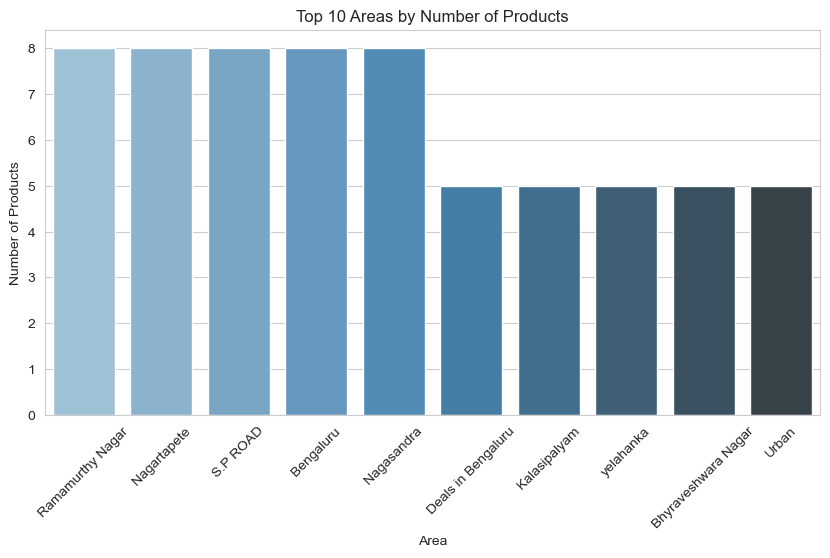

In [6]:
top_areas = df_cleaned['area'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_areas.index, y=top_areas.values, palette='Blues_d')
plt.title('Top 10 Areas by Number of Products')
plt.ylabel('Number of Products')
plt.xlabel('Area')
plt.xticks(rotation=45)
plt.show()


/var/folders/h8/gn0kwk_9543_rv0056cg6rrm0000gn/T/ipykernel_1280/4256500203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_area.values, y=avg_price_area.index, palette='Oranges_r')


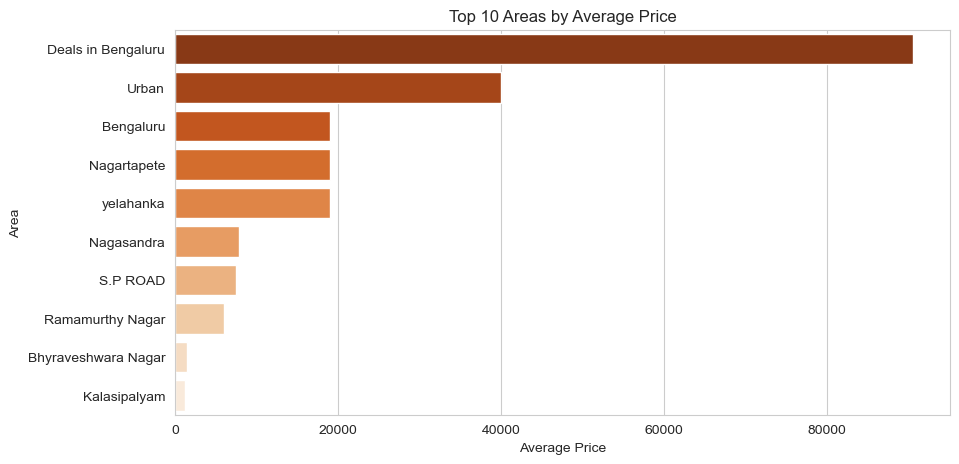

In [7]:
avg_price_area = df_cleaned.groupby('area')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_area.values, y=avg_price_area.index, palette='Oranges_r')
plt.title('Top 10 Areas by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Area')
plt.show()


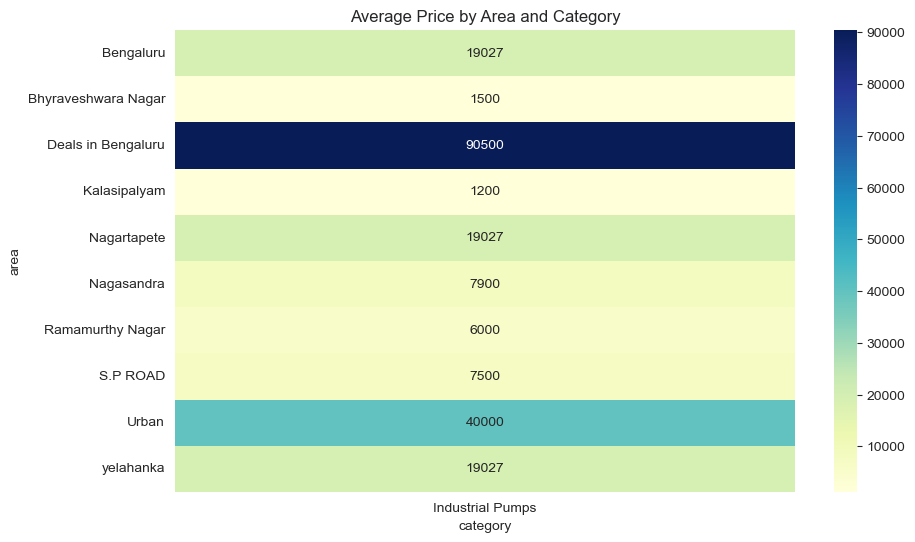

In [8]:
pivot = df_cleaned.pivot_table(index='area', columns='category', values='price', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Average Price by Area and Category")
plt.show()
